In [20]:
import anndata
import numpy as np
import scanpy as sc
import seaborn as sns
import scvi
import matplotlib.pyplot as plt

In [6]:
scvi.settings.seed = 0
print("Last run with scvi-tools version:", scvi.__version__)

Seed set to 0


Last run with scvi-tools version: 1.4.1


In [3]:
adata = sc.read_h5ad("scvi_model/adata.h5ad")
model = scvi.model.SCVI.load("scvi_model", adata=adata)

INFO     File scvi_model/model.pt already downloaded                                                               


/Users/jb_alberge/scvi-env/lib/python3.12/site-packages/scvi/model/base/_base_model.py:857: UserWarning: `accelerator` has been automatically set to `cpu` although 'mps' exists. If you wish to run on mps backend, use explicitly accelerator='mps' in train function.In future releases it will become default for mps supported machines.
  _, _, device = parse_device_args(


In [5]:
model.view_anndata_setup()

Anndata setup with scvi-tools version 1.4.1.

Setup via `SCVI.setup_anndata` with arguments:

{
│   'layer': 'counts',
│   'batch_key': None,
│   'labels_key': None,
│   'size_factor_key': None,
│   'categorical_covariate_keys': ['cell_source', 'donor'],
│   'continuous_covariate_keys': ['percent_mito', 'percent_ribo']
}

         Summary Statistics         
┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃     Summary Stat Key     ┃ Value ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│         n_batch          │   1   │
│         n_cells          │ 18641 │
│ n_extra_categorical_covs │   2   │
│ n_extra_continuous_covs  │   2   │
│         n_labels         │   1   │
│          n_vars          │ 1200  │
└──────────────────────────┴───────┘

                             Data Registry                             
┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Registry Key      ┃            scvi-tools Location             ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│           X            │           adata.layers['counts']           │
│         batch          │          adata.obs['_scvi_batch']          │
│ extra_categorical_covs │ adata.obsm['_scvi_extra_categorical_covs'] │
│ extra_continuous_covs  │ adata.obsm['_scvi_extra_continuous_covs']  │
│         labels         │         adata.obs['_scvi_labels']          │
└────────────────────────┴────────────────────────────────────────────┘

                     batch State Registry                      
┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃     Source Location      ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['_scvi_batch'] │     0      │          0          │
└──────────────────────────┴────────────┴─────────────────────┘

                     labels State Registry                      
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃      Source Location      ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['_scvi_labels'] │     0      │          0          │
└───────────────────────────┴────────────┴─────────────────────┘

               extra_categorical_covs State Registry               
┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃     Source Location      ┃   Categories   ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['cell_source'] │ Harvard-Nuclei │          0          │
│                          │  Sanger-CD45   │          1          │
│                          │  Sanger-Cells  │          2          │
│                          │ Sanger-Nuclei  │          3          │
│                          │                │                     │
│    adata.obs['donor']    │       D1       │          0          │
│                          │       D2       │          1          │
│                          │       D3       │          2          │
│                          │       D4       │          3          │
│                          │       D5       │          4          │
│                          │       D6       │          5          │
│                          │       D7       │          6          │
│                          │      D11       │          7          │
│                          │       H2       │          8          │
│                          │       H3       │          9          │
│                          │       H4       │         10          │
│                          │       H5       │         11          │
│                          │       H6       │         12          │
│                          │       H7       │         13          │
│                          │                │                     │
└──────────────────────────┴────────────────┴─────────────────────┘

 extra_continuous_covs State 
          Registry           
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Source Location      ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['percent_mito'] │
│ adata.obs['percent_ribo'] │
└───────────────────────────┘

In [26]:
scvi.model.LinearSCVI.setup_anndata(adata, layer="counts")
model = scvi.model.LinearSCVI(adata, n_latent=10, latent_distribution='ln')

In [27]:
model.train(max_epochs=250, plan_kwargs={"lr": 5e-3}, check_val_every_n_epoch=10, accelerator='mps')

/Users/jb_alberge/scvi-env/lib/python3.12/site-packages/scvi/train/_trainrunner.py:86: UserWarning: `accelerator` has been set to `mps`. Please note that not all PyTorch/Jax operations are supported with this backend. as a result, some models might be slower and less accurate than usual. Please verify your analysis!Refer to https://github.com/pytorch/pytorch/issues/77764 for more details.
  accelerator, lightning_devices, device = parse_device_args(
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
/Users/jb_alberge/scvi-env/lib/python3.12/site-packages/lightning/pytorch/utilities/_pytree.py:21: `isinstance(treespec, LeafSpec)` is deprecated, use `isinstance(treespec, TreeSpec) and treespec.is_leaf()` instead.
/Users/jb_alberge/scv

Epoch 11/250:   4%|▌            | 10/250 [00:10<03:58,  1.01it/s, v_num=1, train_loss=311]

/Users/jb_alberge/scvi-env/lib/python3.12/site-packages/lightning/pytorch/utilities/_pytree.py:21: `isinstance(treespec, LeafSpec)` is deprecated, use `isinstance(treespec, TreeSpec) and treespec.is_leaf()` instead.
/Users/jb_alberge/scvi-env/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:434: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=13` in the `DataLoader` to improve performance.


Epoch 250/250: 100%|███████████| 250/250 [04:04<00:00,  1.01it/s, v_num=1, train_loss=307]

`Trainer.fit` stopped: `max_epochs=250` reached.


Epoch 250/250: 100%|███████████| 250/250 [04:04<00:00,  1.02it/s, v_num=1, train_loss=307]


<Axes: xlabel='epoch'>

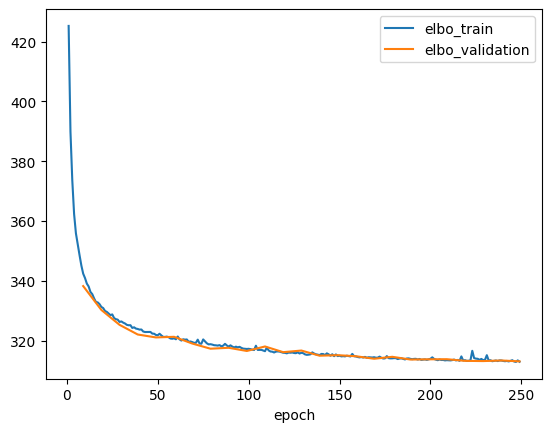

In [28]:
train_elbo = model.history["elbo_train"][1:]
test_elbo = model.history["elbo_validation"]

ax = train_elbo.plot()
test_elbo.plot(ax=ax)

# extract factors

In [29]:
Z_hat = model.get_latent_representation()
for i, z in enumerate(Z_hat.T):
    adata.obs[f"Z_{i}"] = z

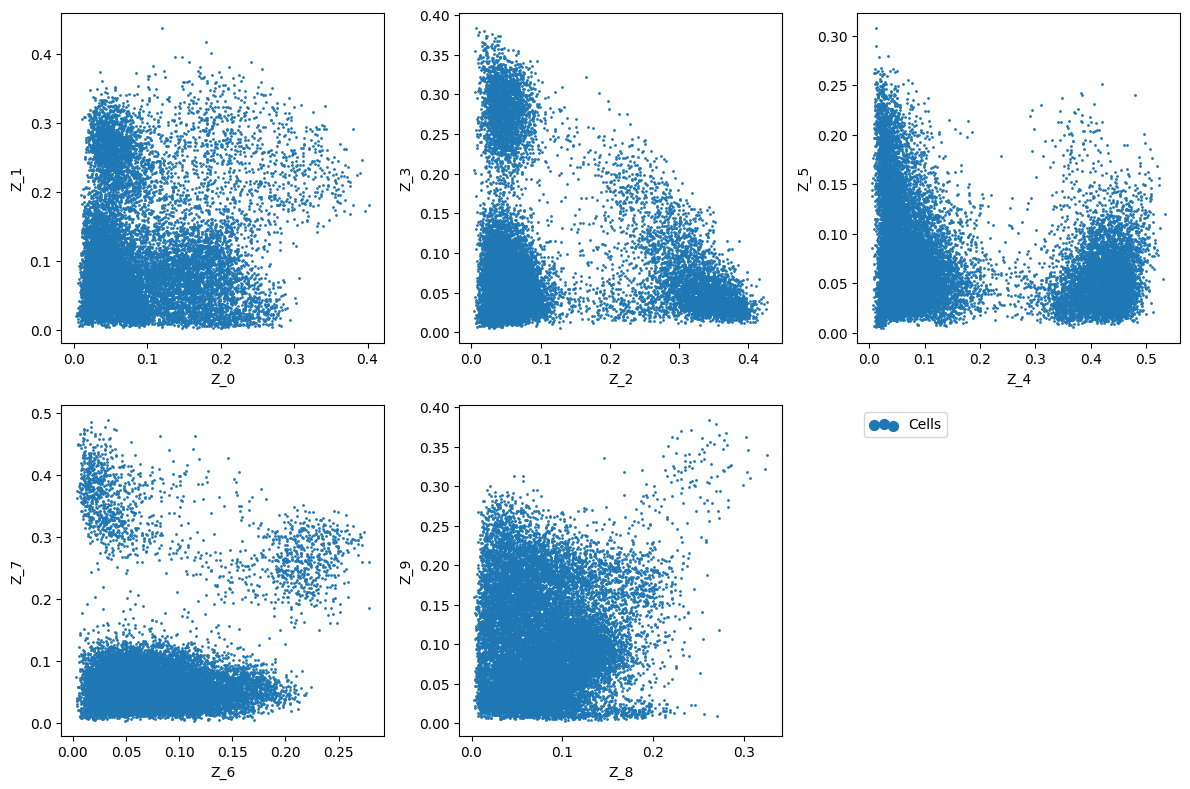

In [30]:
fig = plt.figure(figsize=(12, 8))

for f in range(0, 9, 2):
    plt.subplot(2, 3, int(f / 2) + 1)

    plt.scatter(
        adata.obs[f"Z_{f}"], adata.obs[f"Z_{f + 1}"], marker=".", s=4, label="Cells"
    )

    plt.xlabel(f"Z_{f}")
    plt.ylabel(f"Z_{f + 1}")

plt.subplot(2, 3, 6)
plt.scatter(
    adata.obs[f"Z_{f}"], adata.obs[f"Z_{f + 1}"], marker=".", label="Cells", s=4
)
plt.scatter(adata.obs[f"Z_{f}"], adata.obs[f"Z_{f + 1}"], c="w", label=None)
plt.gca().set_frame_on(False)
plt.gca().axis("off")

lgd = plt.legend(scatterpoints=3, loc="upper left")
for handle in lgd.legend_handles:
    handle.set_sizes([200])


plt.tight_layout()

In [31]:
loadings = model.get_loadings()
loadings.head()

,Z_0,Z_1,Z_2,Z_3,Z_4,Z_5,Z_6,Z_7,Z_8,Z_9
ISG15,3.882726,3.938499,4.862497,-3.867154,-3.120679,-0.191755,5.618211,-0.668005,-0.179335,-12.976293
TNFRSF18,-9.126469,-2.493509,2.819371,-3.377645,-8.575841,-4.765948,15.015226,2.353700,8.744242,-5.404500
VWA1,-2.517961,8.718022,8.356297,4.799774,-4.057884,0.779981,-5.643999,-5.822481,-3.249539,-3.406239
HES5,6.698637,1.915019,11.530333,-10.266521,-0.336486,-9.554537,5.785787,-19.608755,-0.369230,7.376676
SPSB1,-8.387864,0.366963,-2.537808,0.929235,-2.034564,8.569179,1.930318,-11.788766,2.220000,9.847046


In [32]:
print(
    "Top loadings by magnitude\n---------------------------------------------------------------------------------------"
)
for clmn_ in loadings:
    loading_ = loadings[clmn_].sort_values()
    fstr = clmn_ + ":\t"
    fstr += "\t".join([f"{i}, {loading_[i]:.2}" for i in loading_.head(5).index])
    fstr += "\n\t...\n\t"
    fstr += "\t".join([f"{i}, {loading_[i]:.2}" for i in loading_.tail(5).index])
    print(
        fstr
        + "\n---------------------------------------------------------------------------------------\n"
    )

Top loadings by magnitude
---------------------------------------------------------------------------------------
Z_0:	ACSM1, -3.1e+01	AC092979.1, -2.9e+01	FLNC-AS1, -2.9e+01	AC012636.1, -2.6e+01	CPA3, -2.5e+01
	...
	CLIC3, 1e+01	KRT19, 1.1e+01	ACTG2, 1.1e+01	SEMA3G, 1.3e+01	PHLDA2, 1.4e+01
---------------------------------------------------------------------------------------

Z_1:	PTGS2, -1.7e+01	HAMP, -1.6e+01	KRT19, -1.5e+01	BMP10, -1.5e+01	EREG, -1.4e+01
	...
	AC009271.1, 1.8e+01	APOD, 1.9e+01	THBS4, 1.9e+01	TPPP3, 1.9e+01	AC012636.1, 2.2e+01
---------------------------------------------------------------------------------------

Z_2:	XYLT1, -1.3e+01	LINC00881, -1.3e+01	ZNF385B, -1.3e+01	MAPK4, -1.3e+01	CCL20, -1.2e+01
	...
	CLDN5, 1.5e+01	ANO2, 1.6e+01	TPO, 1.6e+01	ACKR1, 1.7e+01	FCN3, 1.7e+01
---------------------------------------------------------------------------------------

Z_3:	LRRC10B, -2e+01	AC018616.1, -1.4e+01	MMP9, -1.3e+01	ANKRD22, -1.3e+01	CPM, -1.3e+01
	...
	NMU, 

# plot latent space components on UMAP

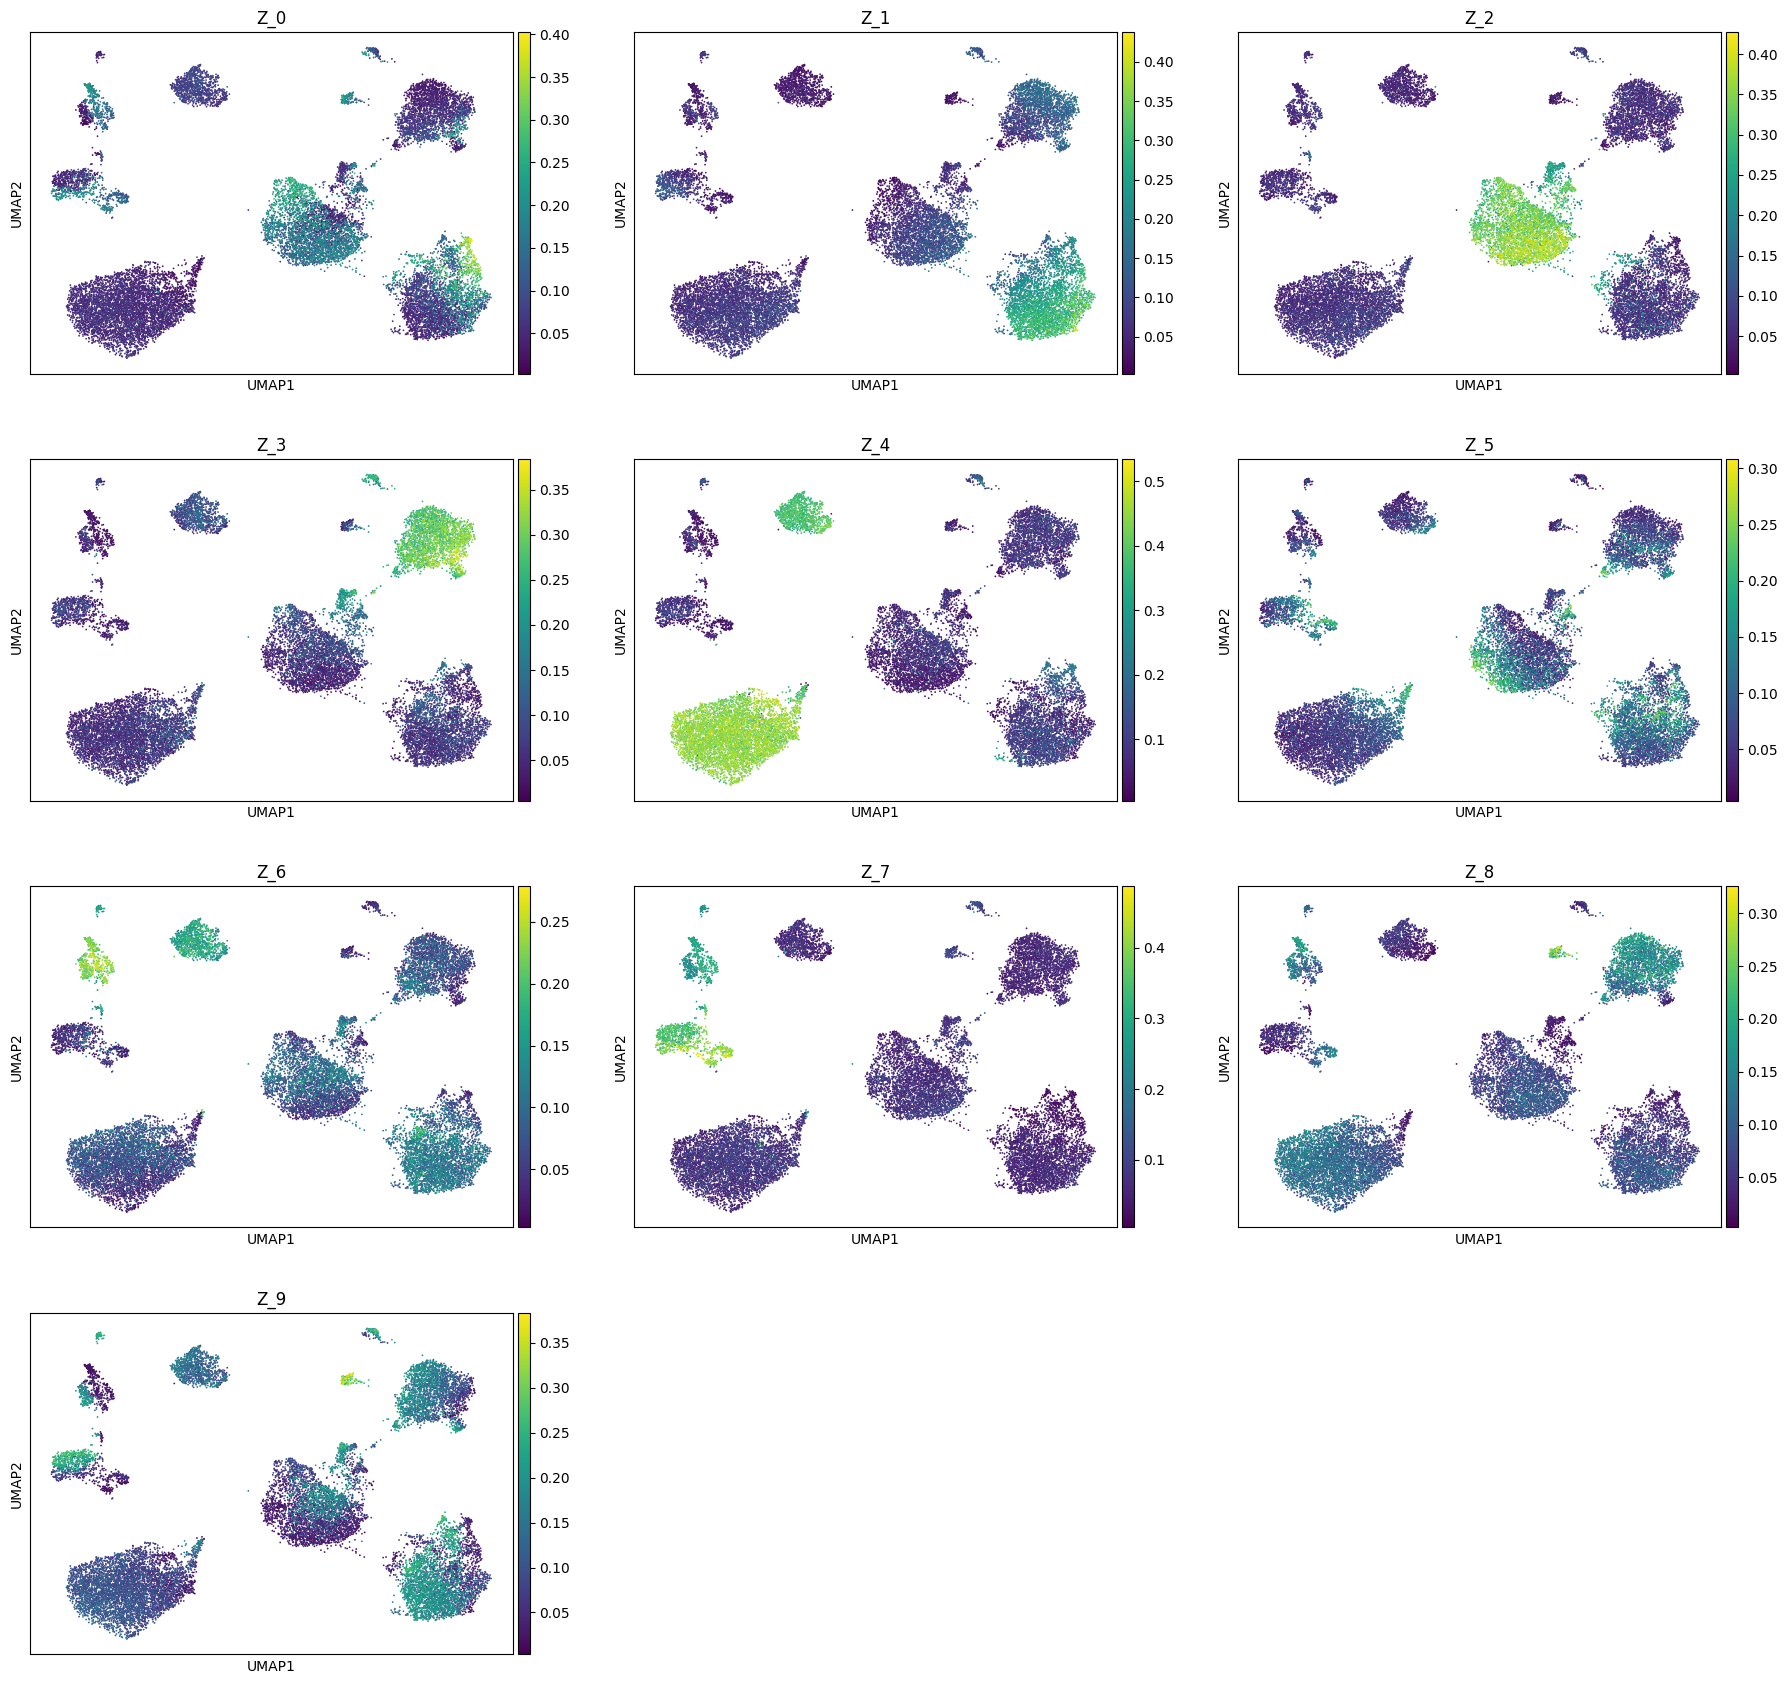

In [33]:
zs = [f"Z_{i}" for i in range(model.n_latent)]
sc.pl.umap(adata, color=zs, ncols=3)